In [1]:
%run setup_for_testing
import interact_gui
import numpy as np

import os.path
import os

In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import interact, fixed
from IPython.display import clear_output

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


## Read images

Provide the exact location of the Dicom dataset
If you are using a Windows machine, do not delete 'r'

In [3]:
input_dir_dicom = r"C:\Users\tszasz\Documents\Projects\RSNA_educational_grant\case_2\coronal T2W pt 18"

In [4]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(input_dir_dicom)
reader.SetFileNames(dicom_names)
image_dicom = reader.Execute()

size_dicom = image_dicom.GetSize()
spacing_dicom = image_dicom.GetSpacing()
print("Image size:", size_dicom[0], size_dicom[1], size_dicom[2], spacing_dicom)

Image size: 560 560 26 (0.2857142984867, 0.2857142984867, 3.0)


In [5]:
print(dicom_names)

('C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0619', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0620', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0621', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0622', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0623', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0624', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0625', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0626', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18/IM_0627', 'C:\\Users\\tszasz\\Documents\\Projects\\RSNA_educational_grant\\case_2\\coronal T2W pt 18

In [6]:
fig_size = (size_dicom[0]/100, size_dicom[1]/100)

<IPython.core.display.Javascript object>


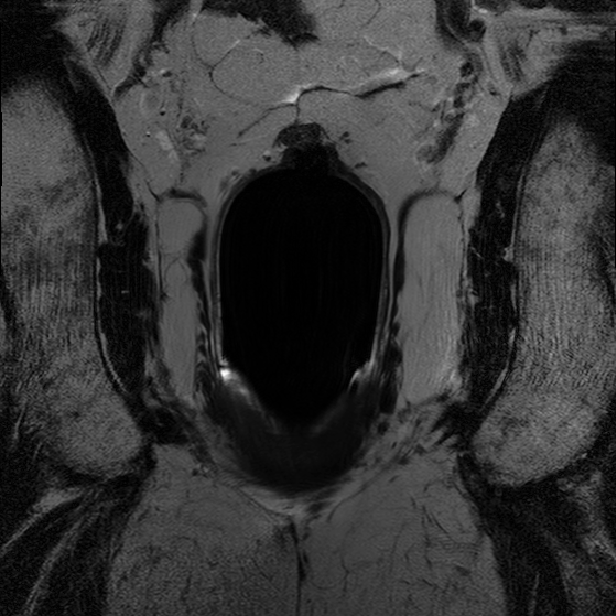

In [7]:
point_acquisition_interface = interact_gui.PointDataAquisition(image_dicom, figure_size=fig_size)

In [8]:
slice_no = int((point_acquisition_interface.npa.shape[0] - 1) / 2)

print(slice_no)

12


In [9]:
series = input_dir_dicom.split("\\")[-1]
case_no = input_dir_dicom.split("\\")[-2]
fname = series + "_" + case_no

In [ ]:
print(fname)

In [ ]:
os.mkdir(fname)

In [ ]:
print(range(size_dicom[2]))

In [ ]:

    filename = dicom_names[slice_no].split("\\")[-1].split("/")[-1]
    point_acquisition_interface.save_current_image(fname + "\\" + filename)

In [10]:
filename = dicom_names[slice_no].split("\\")[-1].split("/")[-1]
point_acquisition_interface.save_current_image(fname + "\\" + filename)


In [11]:
for slice_index in range(size_dicom[2]):
    filename = dicom_names[slice_index].split("\\")[-1].split("/")[-1]
    if slice_index != slice_no:
        print(filename)
        point_acquisition_interface.save_all_images(fname + "\\" + filename, slice_index)
        
            
    
        

IM_0619
IM_0620
IM_0621
IM_0622
IM_0623
IM_0624
IM_0625
IM_0626
IM_0627
IM_0628
IM_0629
IM_0630
IM_0632
IM_0633
IM_0634
IM_0635
IM_0636
IM_0637
IM_0638
IM_0639
IM_0640
IM_0641
IM_0642
IM_0643
IM_0644


In [ ]:
dire = r"C:\Users\tszasz\Documents\Projects\RSNA_educational_grant\choose_location_annotation\saved_dicom"
reader2 = sitk.ImageSeriesReader()
dicom_names2 = reader2.GetGDCMSeriesFileNames(dire)
reader2.SetFileNames(dicom_names2)
image_dicom2 = reader2.Execute()

In [ ]:
size_dicom = image_dicom2.GetSize()
print(size_dicom)

In [ ]:
point_acquisition_interface = interact_gui.PointDataAquisition(image_dicom2, figure_size=fig_size)

Save the selected location in a file (the file updates every time):

In [ ]:
selected_points=point_acquisition_interface.get_point_indexes()
series = input_dir_dicom.split("\\")[-1]
case_no = input_dir_dicom.split("\\")[-2]
filename = series + "_" + case_no

if os.path.exists(filename):
    os.remove(filename)
f= open("%s" % filename, "w+")
f.write('\n'.join('{} {} {}'.format(x[0],x[1], x[2]) for x in selected_points))
f.close()